# Data Mining Versuch Mobile User Analysis and Gender-Age-Group Prediction
* Autor: Prof. Dr. Johannes Maucher
* Datum: 04.10.2016

[Übersicht Ipython Notebooks im Data Mining Praktikum](Data Mining Praktikum.ipynb)

# Einführung

## Kurzbeschreibung:

In diesem Versuch werden die im Rahmen eines Kaggle-Contest [von _TalkingData_ bereitgestellten Daten](https://www.kaggle.com/c/talkingdata-mobile-user-demographics/data) analysiert. Die Daten enthalten für eine große Menge chinesischer User, Angaben zur Marke und Modell des Smartphones und zu den installierten und aktiven Apps. Ziel ist es aus den zur Verfügung stehenden Trainingsdaten ein Modell zu erlernen, das die Klassifikation der User in die jeweilige Gender-Age-Gruppe erlaubt. Für die Lösung dieser Aufgabe müssen sämtliche Schritte der Data Mining Prozesskette implementiert werden:

1. Datenbeschaffung und Zugriff
2. Datenauswahl: Welche der vorhandenen Daten sind für die gegebene Aufgabe tatsächlich relevant
3. Datenbereinigung: Wie wird mit fehlenden und fehlerhaften Daten umgegangen?
4. Datentransformation: Wie können aus den vorhandenen Daten informative Mermale gewonnen werden?
5. Modellbildung: Unüberwachtes oder überwachtes erlernen eines Modells; Clustering-, Klassifikations- oder Regressionsmodell.
6. Evaluation, Visualisierung und Interpretation der Daten/Ergebnisse

## Lernziele:
In diesem Versuch sollen Kenntnisse in folgenden Themen vermittelt werden:

* Zugriff auf Daten in .csv Files
* Zugriff auf Daten in SQLite Files
* Statistische Analyse und Visualisierung von Daten
* Implementierung der oben genannten Data Mining Prozessschritte, insbesondere:

    * Feature-Engineering: Berechnung von für die gegebene Aufgabe relevanter Daten aus Rohdaten
    * Clustering (unüberwachtes Lernen) 
    * Klassifikation/Prädiktion (überwachtes Lernen) mit verschiedenen Machine Learning Verfahren
    * Evaluation von Klassifikationsverfahren

## Aufgaben zur Vorbereitung

1. Laden Sie die Daten entweder vom Skripteserver oder direkt von [Kaggle](https://www.kaggle.com/c/talkingdata-mobile-user-demographics/data) herunter und versuchen Sie die Daten anhand dieser [Beschreibung](https://www.kaggle.com/c/talkingdata-mobile-user-demographics/data) zu verstehen.
2. In diesem Versuch soll die Gender-Age-Group von Smartphone-Usern vorhergesagt werden. Überlegen Sie sich welche der vorhandenen Daten für diese Vorhersage relevant sein könnten.
3. Für die Vorhersage kann ein beliebiger Klassifikationsalgorithmus aus dem Bereich des überwachten Lernens eingesetzt werden. Das Prinzip des überwachten Lernens und das entsprechende Testen des gelernten Modells ist in der unten aufgeführten Abbildung dargestellt. Machen Sie sich mit diesem Prinzip vertraut.

4. Für das überwachte Lernen sind gelabelte Daten (Soll-Ausgabe) notwendig. In diesem Versuch ist die Ausgabe die Gender-Age-Group der User. Im File *gender\_age\_train.csv* ist für 74645 User (devices) die zugehörigen Gender-Age-Group angegeben. Die Menge aller gelabelten Daten muss für die Modellvalidierung in disjunkte Trainings- und Testpartitionen unterteilt werden. In diesem Versuch kommt sowohl eine einfache Partitionierung in Trainings- und Testdaten als auch eine Kreuzvalidierung zum Einsatz ([KI-Vorlesung](https://www.mi.hdm-stuttgart.de/mib/studium/intern/skripteserver/skripte/Einfuehrung_Kuenstliche_Intelligenz/WS1516/06_PartLernen1.pdf)). Machen Sie sich mit dem Prinzip der Kreuzvalidierung (Abbildung unten) vertraut.

5. Den meisten Machine Learning-Algorithmen können kategoriale Parameter nicht direkt übergeben werden. Diese Parameter werden typisch *One-Hot* encodiert. Machen Sie sich mit diesem Prinzip vertraut.

6. In diesem Versuch soll ein Multilayer-Perzeptron (MLP) als Klassifikator eingesetzt werden. Machen Sie sich mit dem MLP vertraut. [KI-Vorlesung](https://www.mi.hdm-stuttgart.de/mib/studium/intern/skripteserver/skripte/Einfuehrung_Kuenstliche_Intelligenz/WS1516/09_PartLernen4.pdf), [MLP in Scikit-Learn](http://scikit-learn.org/stable/modules/neural_networks_supervised.html).

**Prinzip überwachtes Lernen und Validierung:**
![Prinzip überwachtes Lernen](https://www.hdm-stuttgart.de/~maucher/ipnotebooks/DataMining//Bilder/SupervisedLarningSchemaValidation.png "Überwachtes Lernen Schema")





**Prinzip der 10-fachen Kreuzvalidierung:**

![Kreuzvalidierung](https://www.hdm-stuttgart.de/~maucher/ipnotebooks/DataMining//Bilder/CrossValidation.jpg "Cross-Validation")

# Durchführung
## Datenzugriff
Die Daten sind in insgesamt 7 .csv Files organisiert (das File sample_submission.csv wird nicht benötigt). Die einzelnen .csv Dateien sind z.T. sehr groß. In diesem Fall bietet es sich an, nicht das ganze File in einen Pandas-Dataframe zu laden, sondern das .csv-File zunächst in eine Datenbank zu schreiben und dann auf diese dediziert zuzugreifen. 

_Tipp:_ Mit der auf dem Skripteserver bereitgestellten Datei _brandMap.txt_, können die chinesischen Schriftzeichen in den Markennamen übersetzt werden.

**Aufgaben:**

1. Lesen Sie jedes der .csv Files in chunks von jeweils ca. 20000 Zeilen in einen Pandas Dataframe ein und schreiben Sie die Daten chunk für chunk in eine SQLite Database. Für das Einlesen ist die Pandas-Methode [read_csv()](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_csv.html) mit dem Parameter _chunksize_ zu verwenden. Für das schreiben der Daten aus dem Pandas Dataframe in die SQLite Datenbank ist die Pandas-Methode [to_sql()](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.to_sql.html) zu verwenden. Für jedes .csv File soll in der SQLite-DB eine eigene Tabelle angelegt werden. Als DB-connector soll eine engine-Instanz des _SQLAlchemy_-Pakets mit der Methode create\_engine() angelegt werden. Siehe z.B. [SQLAlchemy Doku](http://docs.sqlalchemy.org/en/latest/core/engines.html).

2. Nachdem alle Tabellen der DB angelegt sind, sollen aus jeder Tabelle die ersten 10 Zeilen mit der Pandas Methode [read_sql_query()](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_sql_query.html) abgefragt und angezeigt werden. Ausserdem ist für jede Tabelle die Größe (Anzahl der Zeilen) auszugeben.
3. Wie viele verschiedene devices befinden sich in der Tabelle, welche die Daten aus gender\_age\_train.csv enthält?
4. Wie viele verschiedene devices befinden sich in der Tabelle, welche die Daten aus events.csv enthält?
5. Wie viele verschiedene devices kommen in beiden dieser Tabellen vor? 


In [1]:
# startup init
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.dates as mdates
import matplotlib.patches as mpatches
import datetime

import json
import pandas as pd
import sqlite3 as sq
import glob
import numpy as np
import os
import matplotlib.pyplot as plt
import gmaps
from sqlalchemy import create_engine
engine = create_engine('sqlite:///MobileUser.db')

#Connect sqlite
conn = engine.connect()

In [5]:
#1
def readinchunks(tablename,conn,filename,chunksize):
    for chunk in pd.read_csv(filename, chunksize=20000, iterator=True, encoding='utf-8'):
        chunk.to_sql(name=tablename, con=conn, if_exists='append')
    print 'stored', tablename
        
#Read all CSVs
chunksize = 20000
path = "Ressource/Data/GenderAgePrediction/*.csv"
for filename in glob.glob(path):
    
    rawdata = pd.DataFrame()
    #pd.read_csv(filename)
    
    tablename = filename.replace('.csv','').split('/')[-1]
    
    readinchunks(tablename,conn,filename,chunksize)

stored gender_age_brand_train
stored phone_brand_device_model
stored gender_age_test
stored app_labels
stored label_categories
stored events
stored app_events
stored gender_age_train
stored sample_submission


In [ ]:
#Übersetzung
'''
def removeEmptyLines(filename):
    if not os.path.isfile(filename):
        print("{} does not exist ".format(filename))
        return
    with open(filename) as filehandle:
        lines = filehandle.readlines()
    with open(filename, 'w') as filehandle:
        lines = filter(lambda x: x.strip(), lines)
        filehandle.writelines(lines)
#removeEmptyLines('Ressource/Data/GenderAgePrediction/brandMap.txt')
translation = open('Ressource/Data/GenderAgePrediction/brandMap.txt', 'r').read()
'''
translations =  np.genfromtxt(r'Ressource/Data/GenderAgePrediction/brandMap.txt', delimiter=' ', dtype='string')

for translation in translations:
    #print trans[0] trans[1]
    conn.execute("UPDATE phone_brand_device_model SET phone_brand = \'" + translation[1] + "\' WHERE phone_brand=\'" + translation[0].decode('utf8') +"\'")          

In [45]:
#2

tablelist = list(conn.execute("SELECT name FROM sqlite_master WHERE type='table' ORDER BY name;"))
for row in tablelist:
    print 'table:', row['name']
    print 'count:', conn.execute("SELECT MAX(_ROWID_) FROM "  + row['name']).fetchone()[0]
    print pd.read_sql_query("select * from " + row['name'] + " limit 10", conn)
#    print "sql: select * from " + row['name'] + " limit 10"
    print '\n'

#for filename in glob.glob(path):
#    name = filename.replace('.csv','').split('/')[-1]
#    print 'table: ' + name
#    print 'count:', conn.execute("SELECT MAX(_ROWID_) FROM "  + name).fetchone()[0]
#    print pd.read_sql_query("select * from " + name + " limit 10", conn)
#    print '\n'


table: app_events
count: 32473067
   index  event_id               app_id  is_installed  is_active
0      0         2  5927333115845830913             1          1
1      1         2 -5720078949152207372             1          0
2      2         2 -1633887856876571208             1          0
3      3         2  -653184325010919369             1          1
4      4         2  8693964245073640147             1          1
5      5         2  4775896950989639373             1          1
6      6         2 -8022267440849930066             1          0
7      7         2  9112463267739110219             1          0
8      8         2 -3725672010020973973             1          0
9      9         2  7167114343576723123             1          1


table: app_labels
count: 459943
   index               app_id  label_id
0      0  7324884708820027918       251
1      1 -4494216993218550286       251
2      2  6058196446775239644       406
3      3  6058196446775239644       407
4      4  8694625

In [56]:
#3
device_ids = conn.execute("SELECT DISTINCT count(device_id) FROM gender_age_train").fetchone()[0]
print 'device ids:', device_ids

device ids: 74645


In [51]:
#4
event_device_ids = conn.execute("SELECT count(DISTINCT device_id) FROM events").fetchone()[0]
print 'event device ids:', event_device_ids


event device ids: 60865


In [55]:
#5
common_ids = conn.execute("SELECT count(DISTINCT events.device_id) FROM events INNER JOIN gender_age_train ON events.device_id = gender_age_train.device_id;").fetchone()[0]
print 'common ids:', common_ids

common ids: 23309


## Deskriptive Statistik

In der obigen Teilaufgabe sollte die Schnittstelle zwischen Pandas Dataframes und Datenbanken (hier SQLite) demonstriert werden. Diese Art von Datenhandling eignet sich besonders im Fall sehr großer Datenmengen, die nicht im Arbeitsspeicher gehalten werden können. Die Dateien in diesem Versuch sind tatsächlich nicht so groß, dass sie nicht als ganzes in Pandas-Dataframes geladen werden könnten. In allen folgenden Teilversuchen ist Ihnen freigestellt, ob Sie mit der Datenbank-Variante oder der in-memory Variante (alle Daten im Pandas-Dataframe) arbeiten.

### Verteilung der User über die Gender-Age-Gruppen

Die Menge aller User wird in 12 verschiedene Gender-Age-Groups unterteilt. Bestimmen Sie die Verteilung der User in der gender\_age\_train-Tabelle über diese 12 Gruppen und viusalisieren Sie diese Verteilung in einem [Matplolib Bar Chart](http://matplotlib.org/api/pyplot_api.html). 
 

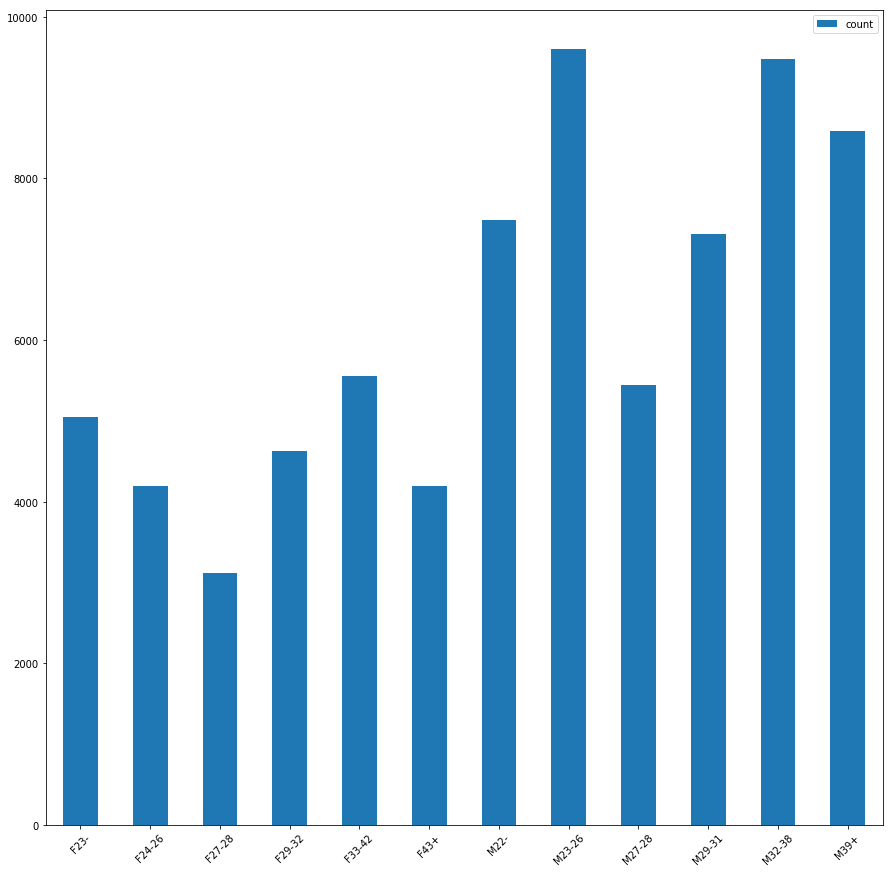

In [19]:
genderagegroupscount = pd.read_sql_query("SELECT distinct agegroup, COUNT(device_id) AS `count` FROM gender_age_train GROUP BY agegroup", conn)
#print genderagegroupscount

genderagegroupscount.plot(kind='bar', figsize=(15,15))
plt.xticks(genderagegroupscount.index.values, genderagegroupscount['agegroup'], rotation=45)
plt.show()

### Verteilung der User über die Smartphone-Marken

1. Bestimmen Sie die Anzahl der verschiedenen Devices und die Anzahl der verschiedenen Marken in der Tabelle *phone\_brand\_device\_model*.
2. Fügen Sie dem Pandas Dataframe mit der *gender_age_train*-Tabelle eine Spalte _brand_ hinzu und schreiben Sie in diese Spalte den Markennamen des zur jeweiligen Zeile gehörenden Device.
3. Schreiben Sie den um den Markennamen erweiterten Dataframe in ein File *gender\_age\_brand\_train.csv*.
4. Bestimmmen Sie mittels der Dataframe-Methode *value_counts()* die Anzahl der Devices pro Marke.
5. Stellen Sie diese Verteilung der Devices über die Marken für die 20 häufigsten Marken grafisch mit einem *Matplotlib-bar-chart dar.*
6. Untersuchen Sie jetzt die Verteilung der Devices über die Marken pro Gender-Age-Group. Gibt es eine Korrelation zwischen Gender-Age-Group und Häufigkeit der Marken? Überlegen sie sich eine Visualisierung mit der eine derartige Korrelation bestätigt oder widerlegt werden kann. Implementieren Sie die Visualisierung und zeigen Sie anhand dieser Visualisierung mögliche Korrelationen zwischen Gender-Age-Group und Markenhäufigkeit. 

In [20]:
#1
print "Verschiedene Devices: ", conn.execute("SELECT count(DISTINCT device_id) FROM phone_brand_device_model;").fetchone()[0]
print "Verschiedene Marken: ", conn.execute("SELECT count(DISTINCT phone_brand) FROM phone_brand_device_model;").fetchone()[0]

Verschiedene Devices:  186716
Verschiedene Marken:  130


In [5]:
#2
extendedDataFrame = pd.read_sql_query("SELECT gender_age_train.*, phone_brand as brand FROM gender_age_train LEFT JOIN phone_brand_device_model on phone_brand_device_model.device_id = gender_age_train.device_id;", conn)

print extendedDataFrame.head(10)

   index            device_id gender  age agegroup    brand
0      0 -8076087639492063270      M   35   M32-38   xiaomi
1      1 -2897161552818060146      M   35   M32-38   xiaomi
2      2 -8260683887967679142      M   35   M32-38   xiaomi
3      3 -4938849341048082022      M   30   M29-31   xiaomi
4      4   245133531816851882      M   30   M29-31   xiaomi
5      5 -1297074871525174196      F   24   F24-26     OPPO
6      6   236877999787307864      M   36   M32-38  coolpad
7      7 -8098239495777311881      M   38   M32-38   xiaomi
8      8   176515041953473526      M   33   M32-38     vivo
9      9  1596610250680140042      F   36   F33-42  samsung


In [22]:
#3 gender_age_brand_train.csv
extendedDataFrame.to_csv(path_or_buf="Ressource/Data/GenderAgePrediction/gender_age_brand_train.csv", encoding='utf-8')

In [28]:
#4
devicesByBrands = extendedDataFrame['brand'].value_counts()
print devicesByBrands.head(10)

xiaomi     17336
samsung    13706
huawei     13001
OPPO        5802
vivo        5658
meizu       4710
coolpad     3349
lenovo      2695
gionee      1124
HTC         1015
Name: brand, dtype: int64


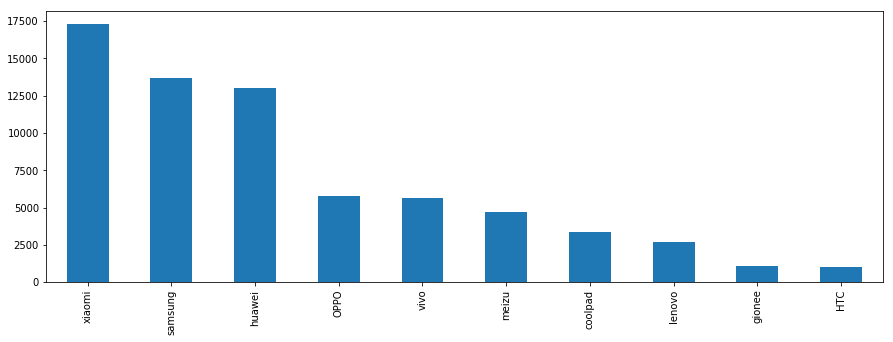

In [61]:
#5
#print type(devicesByBrands)
devicesByBrands.head(10).plot(x="brand", y="dtype", figsize=(15,5), kind='bar')
plt.show()

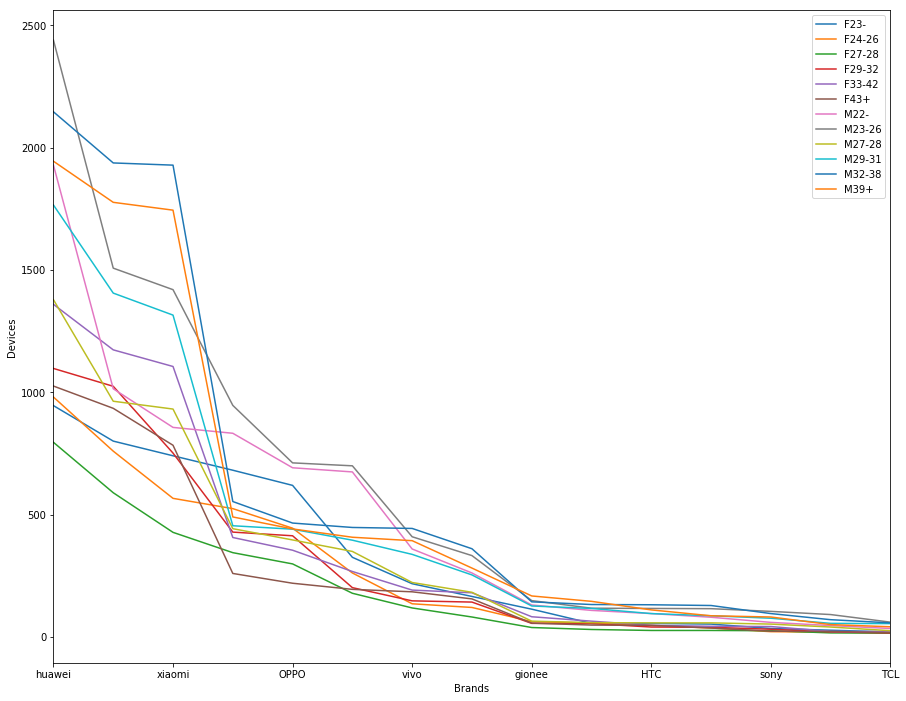

'\nWie im Plot zu sehen gibt es Korrelationen zwischen Marke und Genderagegroup.\n\xc3\x9cber alle Genderaggroups hinweg sind einige Marken st\xc3\xa4rker vertreten als andere.\nF\xc3\xbcr die Top 10 Marken ergeben sich charakteristische Graphen f\xc3\xbcr die einzelnen genderagegroups.\nWobei die Marke Huwai im vergleich zu den den anderen Marken st\xc3\xa4rker bei den M\xc3\xa4nnern\nvertreten ist als bei den Frauen. \n'

In [28]:
for group in ageGroups['agegroup']:
#    _labels['labels'] = 
    extendedDataFrame[extendedDataFrame.agegroup == group]['brand'].value_counts().head(15).plot(x="brand", y="dtype", figsize=(15,12), label=group)
plt.legend()
plt.xlabel('Brands')
plt.ylabel('Devices')
plt.show()
'''
Wie im Plot zu sehen gibt es Korrelationen zwischen Marke und Genderagegroup.
Über alle Genderaggroups hinweg sind einige Marken stärker vertreten als andere.
Für die Top 10 Marken ergeben sich charakteristische Graphen für die einzelnen genderagegroups.
Wobei die Marke Huwai im vergleich zu den den anderen Marken stärker bei den Männern
vertreten ist als bei den Frauen. 
'''

## Spatio-Temporale Analyse des Verhaltens einzelner User

1. Wählen Sie aus der *events*-Tabelle ein Device, für das mindestens 30 events mit zugewiesenen Geokordinaten vorliegen.
2. Stellen Sie alle Aufenthaltsorte des zu diesem Device gehörenden Users in einer *gmaps-Heatmap* dar. Informationen hierzu finden Sie in der [gmaps-Doku]( https://github.com/pbugnion/gmaps). Für den Zugriff auf gmaps benötigen Sie einen Google-API-Key (siehe [gmaps authentication](http://jupyter-gmaps.readthedocs.io/en/latest/authentication.html))
3. Clustern Sie die 2-dimensionalen Geodaten des ausgewählten Users mit dem [DBSCAN-Algorithmus von scikit-learn](http://scikit-learn.org/stable/auto_examples/cluster/plot_dbscan.html). Die Parameter des Algorithmus sind so zu wählen, dass wesentlich unterschiedliche Orte des Users in unterschiedlichen Clustern landen.
4. Stellen Sie den zeitlichen Verlauf der Events des ausgewählten Users im unten dargestellten Stil visuell dar. Auf der horizontalen Achse ist die Zeit relativ zur Zeit des ersten Events in Sekunden dargestellt. Auf der vertikalen Achse ist die Anzahl der bisherigen Events des Users aufgetragen. Mit jedem Event wird der Wert auf der vertikalen Achse um 1 erhöht. Die Farbe der Marker im Graph gibt den Aufenthaltscluster an. Für jeden in der vorigen Teilaufgabe gefundenen Aufenthaltscluster wird eine unterschiedliche Farbe benutzt (Im Beispiel unten wurden nur 2 Cluster gefunden). Diskutieren Sie das Verhalten des Users anhand des Graphs.

![Abbildung Zeitliches Auftreten der Events](https://www.hdm-stuttgart.de/~maucher/ipnotebooks/DataMining//Bilder/tempbehave.PNG "Events über der Zeit")

In [29]:
#print pd.read_sql_query("SELECT device_id FROM events ", conn)

#1
#device_id = 29182687948017175
device_id = 4830593356246717684
entrycount = conn.execute("SELECT count(device_id) FROM events where device_id =" + str(device_id)).fetchone()[0]
print device_id, 'entrys:', entrycount
gmapsAPIKey=json.load(open('google_api_key.json'))["GOOGLE_API_KEY"]

#2
gmaps.configure(gmapsAPIKey)

events = pd.read_sql_query("SELECT * FROM events where device_id =" + str(device_id), conn)
#events = pd.read_sql_query("SELECT latitude,longitude FROM events limit 2000", conn)
#locations = events

#import gmaps.datasets
#location = gmaps.datasets.load_dataset("taxi_rides")
#print location[0]
#print locations[0]

fig = gmaps.figure()
fig.add_layer(gmaps.heatmap_layer(events[['latitude','longitude']]))
fig

4830593356246717684 entrys: 105


Figure()

/usr/local/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/usr/local/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


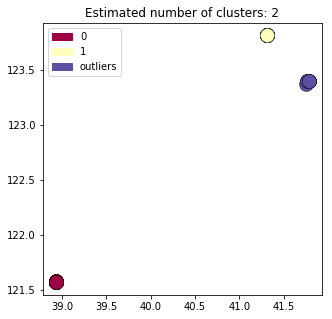

In [4]:
#3
# get data
events = pd.read_sql_query("SELECT * FROM events where device_id =" + str(device_id), conn)


# split data into two frames
# events with no location data
events_zero = events[events.longitude == 0.0]
# events with location
events_notzero = events[events.longitude != 0.0]


# compute DBSCAN
db = DBSCAN(eps=0.3, min_samples=10).fit(events_notzero[['longitude','latitude']])
labels = db.labels_


# assign labels to events with location data
events_notzero['cluster'] = db.labels_

# assign -2 to all events that have location data
events_zero['cluster'] = -2


# merge events back again
extended_events = pd.concat([events_zero, events_notzero], ignore_index=True)
#events_notzero.append(events_zero)

# check if events still same size
#print extended_events.size == events.size

# number of clusters in labels – ignoring noise
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
#print('Estimated number of clusters: %d' % n_clusters_)

# get unique labels
unique_labels = set(labels)

# assign color to every unique label
colors = plt.cm.Spectral(np.linspace(0, 1, len(unique_labels)))

# color helper
colorMap = {key: value for (key, value) in zip(unique_labels, colors)}
#print colorMap
def getClustomColor(label):
    if label in colorMap:
        return list(colorMap[label])
    else:
        return 'black'

# set up patches for the legend
patches = [mpatches.Patch(color=getClustomColor(label), label=(label if label >= 0 else 'outliers')) for label in unique_labels] 

plt.figure(figsize=(5, 5))

for index, row in extended_events.iterrows():
    # print row['latitude'], row['longitude']
    # don't plot entrys with no location data
    if row['cluster'] != -2:
#        print row['latitude'] == 0, row['latitude']
        plt.plot(row['latitude'], row['longitude'], 'o', markerfacecolor=(getClustomColor(row['cluster'])), markeredgecolor='black', markeredgewidth=.4, markersize=14)
    
plt.legend(handles=patches, loc='best', prop={'size':10})
plt.title('Estimated number of clusters: %d' % n_clusters_)
#plt.axis([31,32,121,122])
plt.show()
    


samplesize: 840


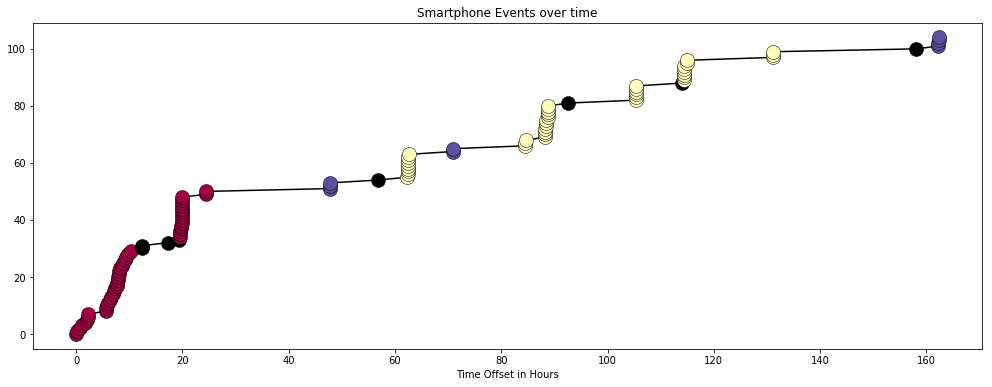

In [5]:
# 4

# format timestamp
extended_events['timestamp'] = extended_events['timestamp'].astype('datetime64[ns]')

# sort by timestamp
extended_events.sort_values(by=['timestamp'], inplace=True)

# add time delta in hours
delta = []
for ts in extended_events['timestamp']:
    firsttime = extended_events['timestamp'].iloc[0]
    delta.append(((ts-firsttime).total_seconds())/60/60)
extended_events['delta'] = delta

# set figure size
plt.figure(figsize=(17, 6))

# plot line
plt.plot(extended_events['delta'], range(len(events)), '-k')
plt.xlabel("Time Offset in Hours")

# plot dots
count = 0
for index, row in extended_events.iterrows():
    plt.plot(row['delta'], count, 'bo-', markerfacecolor=(getClustomColor(row['cluster'])), markeredgecolor='black', markeredgewidth=.5, markersize=14)
    count = count + 1

print 'samplesize:', extended_events.size
#plt.legend(handles=patches, loc='best', prop={'size':10})

plt.title('Smartphone Events over time')
plt.show()

'''
Der Zeitraum der Auftragung beträgt etwas mehr als 160 Stunden also ungefähr eine Woche. 
Die roten Punkte sind ein der Cluster an Ort A, die gelben an Ort B. 
Violette Punkte, können keinem Cluster exakt zugeordnet werden
und bei den schwarzen Punkten gib es keine Standortinformation.
Auswertung:
    1. Am ersten Tag wurde das sehr viel benutzt.
    2. Die Person hat sich an diesem ersten Tag an Ort A aufgehalten.
    3. Zwischen Stunde 45 und 50 hat sich die Person wahrscheinlich von 
        Ort A nach Ort B bewegt und irgendwo auf dem Weg sein Handy benutzt.
    4. Danach benutze die Person ihr Handy etwa ein ein bis zwei Mal pro Tag.
    5. Nach dem Wechsel von Ort A an Ort B benutzte die Person ihr Handy deutlich 
        seltener pro Tag. Es kamen nur noch etwa ein viertel der Events pro Tag 
        verglichen mit dem ersten Tag.
    
    Die Daten deuten auf einen Berufstätigen Pendler hin
'''

# Feature Extraction

Anmerkung: In den vorigen Aufgaben war das Vorgehen relativ konkret vorgegeben. In den folgenden Aufgaben sind die Vorgaben bewußt knapp gehalten. Ihre Kreativität ist gefragt.

1. Überlegen Sie sich aus welchen Merkmalen, die aus den vorhandenen Daten extrahiert werden können, möglichst gut die Gender-Age-Group vorhergesagt werden kann.
2. Extahieren Sie diese Merkmale aus den Daten für möglichst viele (mindestens 20.000) User (devices) aus der Tabelle *gender_age_train*.  

In [16]:
## feature extraction
## takes a while – be sure to have sufficient memory when running this
## ~9gb ram

'''
Die Grundidee ist, dass die nützlichen Informationen aus den Daten gezogen werden, 
um die Gender-Age-Gruppe möglichst gut vorherzusagen.
Die Events spielen dabei eine große Rolle, da sie sehr oft pro device auftreten 
und in Kombination mit anderen Merkmalen sehr nützlich sein können. 
Z.B.: Man stelle sich vor ein, zu einem Gerät gibt es tausende auswertbare 
Zeitstempel, dazu kommt, dass für jeden Zeitstempel festgehalten wurde, 
welche App benutzt wurde. 
Somit können sich allein davon schon Abschätzungen ableiten um welche Altersgruppe 
es sich handeln könnte. 
Wahrscheinlich ist, dass die Mehrzahl der jüngeren Personen(bis-25) eher dazu neigt 
Games zu spielen, als ältere Menschen.
Die 25-60 Jahre alten Menschen werden sich wahrscheinlich mehr mit Apps beschäftigen 
die mit Finanzen und Politik zu tun haben und weniger Spiele spielen.
Auch die Tageszeit wird eine rolle Spielen da sich die Nutzungsgewohnheiten 
der Altersgruppen unterscheiden.
So unsere Vermutung.  
Das Vorgehen dabei ist, die Daten so aufzubereiten, dass sich möglichst vollständig 
und selektiert sind.
Merkmale die für die Klassifizierung wichtig sind werden zusammengetragen. 
Am Ende erhält man ein Dataframe mit den Nutzungsvektoren.

Die konzepte zur aufbereitung nennen sich Feature Extraction und Feature Selection.
* Feature Selection – das auswählen der charakteristischen Daten
* Feature Extraction – das extrahieren von Daten aus den gegebenen Daten

Als Merkmale nutzen wir:
* timestamp(events) – wann das gerät benutzt wird dies unterteilen wir in 24 stunden
    während der Arbeitszeiten, Nachts oder Während der Schule
* phone_brand(label_categories) – welche marke genutzt wird
    premium, luxus oder günstige Marken
* model – telefon model
    könnte aufschluss über das Geschlecht und die Altersgruppe geben, 
    da Frauen und Männer verschiedene modelle bevorzugen und
    teure modelle eher bei älteren Nutzern zu finden sind
* category(label_categories) – zu welcher category eine app gehört
    z.B. spiele werden stärker bei Jungeren nutzern vertreten sein
'''

import gc
gc.collect()

## only using 2 dataframes for memory efficiency
df1 = pd.read_sql_query("SELECT * FROM gender_age_train group by device_id", conn)
#df1 = pd.read_sql_query("SELECT * FROM gender_age_train limit 20000", conn)

# 1. merge
df2 = pd.read_sql_query("SELECT * FROM events group by device_id", conn)
df1 = df1.merge(df2, how='inner', on='device_id')
print 'm1: ', df1.columns.values, 
print 'rows: ' , df1.size
gc.collect()

# 2. merge
df2 = pd.read_sql_query("SELECT * FROM phone_brand_device_model group by device_id", conn)
df1 = df1.merge(df2, how='inner', on='device_id')
print 'm2: ', df1.columns.values, 
print 'rows: ' , df1.size
gc.collect()

# 3. merge
df2 = pd.read_sql_query("SELECT * FROM app_events", conn)
df1 = df1.merge(df2, how='inner', on='event_id')
print 'm3: ', df1.columns.values, 
print 'rows: ' , df1.size
gc.collect()

# 4. merge
df2 = pd.read_sql_query("SELECT * FROM app_labels", conn)
df1 = df1.merge(df2, how='inner', on='app_id')
print 'm4: ', df1.columns.values, 
print 'rows: ' , df1.size
gc.collect()

# 5. merge
df2 = pd.read_sql_query("SELECT * FROM label_categories", conn)
df1 = df1.merge(df2, how='inner', on='label_id')
print 'm5: ', df1.columns.values, 
print 'rows: ' , df1.size
gc.collect()

## data cleanup
# remove all unwanted columns that don't hold usable information
# longitude and latitude (location) may don't have much to do with genderagegroup
# index_y and index_x are leftovers from the merges
# is_installed is always true for the whole dataset
# event_id is also not giving any valuable information about the vector
# duplicate – label_id is only a the numeral representation of the category
# removing app_id as category should give enough info about the usage

#print set(df1.is_active)
#print set(df1.is_installed)

df1.drop(df1[df1.is_active == 0].index, inplace=True)
df1.drop(['index_x','index_y','longitude','latitude','is_installed','event_id','label_id','app_id'], axis=1, inplace=True)

# finally remove duplicate rows
df1.drop_duplicates(inplace=True)

#print df1
gc.collect()

print '\nlength of final dataframe:',df1.index.size
print 'number of distinct device ids:', len(set(df1.device_id))
print 'columns:', df1.columns.values

m1:  [u'index_x' u'device_id' u'gender' u'age' u'agegroup' u'index_y'
 u'event_id' u'timestamp' u'longitude' u'latitude'] rows:  12155950
m2:  [u'index_x' u'device_id' u'gender' u'age' u'agegroup' u'index_y'
 u'event_id' u'timestamp' u'longitude' u'latitude' u'index' u'phone_brand'
 u'device_model'] rows:  15866162
m3:  [u'index_x' u'device_id' u'gender' u'age' u'agegroup' u'index_y'
 u'event_id' u'timestamp' u'longitude' u'latitude' u'index_x'
 u'phone_brand' u'device_model' u'index_y' u'app_id' u'is_installed'
 u'is_active'] rows:  208648684
m4:  [u'index_x' u'device_id' u'gender' u'age' u'agegroup' u'index_y'
 u'event_id' u'timestamp' u'longitude' u'latitude' u'index_x'
 u'phone_brand' u'device_model' u'index_y' u'app_id' u'is_installed'
 u'is_active' u'index' u'label_id'] rows:  1502169735
m5:  [u'index_x' u'device_id' u'gender' u'age' u'agegroup' u'index_y'
 u'event_id' u'timestamp' u'longitude' u'latitude' u'index_x'
 u'phone_brand' u'device_model' u'index_y' u'app_id' u'is_insta

In [17]:
## save df to sqlite db
## this takes a while
df1.to_sql('bigdata', conn, chunksize=200000)

## save df to a csv – not efficient
#df1.to_csv("Ressource/Data/bigdata.csv", encoding='utf-8')

In [18]:
df1.index.size

12006588

In [9]:
## read random rows from sqlite db
df1 = pd.read_sql_query("SELECT * FROM bigdata ORDER BY RANDOM() LIMIT 600000;", conn)

## read random rows from csv – not efficient
'''
import random
filepath = "Ressource/Data/bigdata.csv"

# read csv with random sample size
n = 78360118 #number of rows in the file
s = 20000 #desired sample size
skip = sorted(np.random.choice(np.arange(1,n+1), (n-s), replace=False))
df1 = pd.read_csv(filepath, skiprows=skip, encoding='utf-8')

# remove csv leftover
df1.drop('Unnamed: 0', 1, inplace=True)
'''

'\nimport random\nfilepath = "Ressource/Data/bigdata.csv"\n\n# read csv with random sample size\nn = 78360118 #number of rows in the file\ns = 20000 #desired sample size\nskip = sorted(np.random.choice(np.arange(1,n+1), (n-s), replace=False))\ndf1 = pd.read_csv(filepath, skiprows=skip, encoding=\'utf-8\')\n\n# remove csv leftover\ndf1.drop(\'Unnamed: 0\', 1, inplace=True)\n'

In [10]:
## call garbeagecollector directly to cleanup – happens automatically but we want to keep the ram at minimum ~1.3gb
import gc
gc.collect()

0

In [11]:
## get an overview of the data
print 'number of device_ids:', len(df1.device_id.unique())
print 'size:', df1.index.size
print df1.columns.values
print df1.sample(5)

number of device_ids: 20494
size: 600000
[u'index' u'device_id' u'gender' u'age' u'agegroup' u'timestamp'
 u'phone_brand' u'device_model' u'category' u'time_of_day']
           index            device_id gender  age agegroup  \
418585  33967648 -3045139278169088099      M   32   M32-38   
45233   60132274  7548795466428524847      M   42     M39+   
411409  75673908  3875639602151236040      M   24   M23-26   
59931   69081773  5339897725185405729      F   33   F33-42   
193242  69623400  6481794979237385775      M   52     M39+   

                  timestamp phone_brand device_model  \
418585  2016-05-07 00:43:27      xiaomi         MI 4   
45233   2016-05-04 21:16:04     coolpad         5950   
411409  2016-05-02 10:01:02       meizu     魅蓝Note 2   
59931   2016-05-01 15:47:07        vivo        X5Pro   
193242  2016-05-07 11:27:08      huawei         荣耀3C   

                        category  time_of_day  
418585  Personal Effectiveness 1            0  
45233          Wealth Manage

In [12]:
#temp = df1.sample(10)
#temp = df1.sample(1000000)
temp = df1.copy(deep=True)
print temp.columns.values

## categorize timestamps into 24 hours per day
def to_hour(ts):
    ts = pd.to_datetime(ts, format='%Y-%m-%d %H:%M:%S')
    #delta = datetime.timedelta(hours=ts.hour, minutes=ts.minute, seconds=ts.second)
    #return delta.total_seconds()
    return ts.hour

temp['time_of_day'] = temp.timestamp.apply(to_hour)

## more cleanup
temp.drop('timestamp',axis=1,inplace=True)
temp.drop(temp[temp.is_active == 0].index, inplace=True)
temp.drop(['index','is_active','gender','device_id','age'], 1, inplace=True)
#temp.drop(['index','gender','device_id','age'], 1, inplace=True)

print temp.sample(5)

[u'index' u'device_id' u'gender' u'age' u'agegroup' u'timestamp'
 u'phone_brand' u'device_model' u'category' u'time_of_day']
       agegroup phone_brand device_model           category  time_of_day
359324     M39+     coolpad   ivvi 小骨Pro  Wealth Management            0
494308     M22-     samsung   Galaxy Win        Relatives 1           14
385007   M32-38       yuxin          红辣椒           Low Risk            0
418783   M32-38        lshi       超级手机1s       Industry tag            0
365734   F27-28      huawei    Ascend G7      Low liquidity            7


# Gender-Age-Group Prediction
* In der vorigen Aufgabe wurde für jeden User (device) ein Merkmalsvektor berechnet. Die Menge der Merkmalsvektoren aller User aus der Tabelle *gender_age_train* bildet die Eingabe-Matrix $X$ für die Klassifikationsalgorithmen. Die Soll-Ausgabe Vektor $y$ wird durch die *gender_age_group* der User gebildet. Bringen Sie die Matrix aller Eingabevektoren in eine Form, in der
    * alle kategorialen Parameter *One-Hot*-encodiert sind [Scikit-Learn One-Hot-Encoder](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html#sklearn.preprocessing.OneHotEncoder).
    * alle Merkmale eine Varianz von 1 aufweisen. Benützen Sie hierfür die [Scikit-Learn Methode scale](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.scale.html#sklearn.preprocessing.scale).

* Teilen Sie die Datensätze in $X$ und $y$ in eine Trainings- und eine Testpartition auf - im Verhältnis $3/4$ für Training, $1/4$ für Test. 

In [29]:
from sklearn.preprocessing import scale

# label encoding agegroups
# replace ageroups with integers
factorized_agegroup = pd.factorize(temp['agegroup'])
temp['agegroup_cat'] = factorized_agegroup[0]

# create labels for agegroup
labels = factorized_agegroup[1]
# save labels to disk
np.save('labels.npy', labels.get_values())


# onehot encoding the rest
onehotenc = pd.get_dummies(temp.drop(['agegroup'], 1))
print 'temp shape:', temp.shape
print 'onehotenc shape:', onehotenc.shape
#print onehotenc.sample(5)

temp shape: (600000, 6)
onehotenc shape: (600000, 1371)


In [10]:
# split data into X = data and y = labels
y = np.asarray(onehotenc.agegroup_cat)

In [11]:
X = onehotenc.drop(['agegroup_cat'], 1)

In [12]:
# scale X
X = scale(X)

print 'standard deviation:', X.std()
print 'shape of scaled data (X):', X.shape

standard deviation: 1.0
shape of scaled data (X): (600000, 1371)


In [15]:
## save X and y
np.save('X.npy', X)
np.save('y.npy', y)

In [2]:
## load X and y
X = np.load('X.npy')
y = np.load('y.npy')

In [16]:
## split data

from sklearn.model_selection import train_test_split

# split X and y in test and train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [ ]:
## save data
np.save('X_train.npy', X_train)
np.save('y_train.npy', y_train)

np.save('X_test.npy', X_test)
np.save('y_test.npy', y_test)

In [20]:
## load train data
X_train = np.load('X_train.npy')
y_train = np.load('y_train.npy')

In [6]:
print 'X_train:', X_train.shape
print 'y_train:', y_train.shape

X_train: (450000, 1371)
y_train: (450000,)


* Trainieren Sie mit der Trainingspartition ein [Multilayer-Perzeptron](http://scikit-learn.org/stable/modules/neural_networks_supervised.html).

In [8]:
from sklearn.neural_network import MLPClassifier

clf = MLPClassifier(hidden_layer_sizes=(13,13,13)
                    #,max_iter=20000
                   )

clf.fit(X_train,y_train)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(13, 13, 13), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

In [2]:
#save classifier to disk
from sklearn.externals import joblib

filename = 'Ressource/Data/mobile_user_classifier.joblib.pkl'
_ = joblib.dump(clf, filename, compress=9)

#clf = joblib.load(filename)

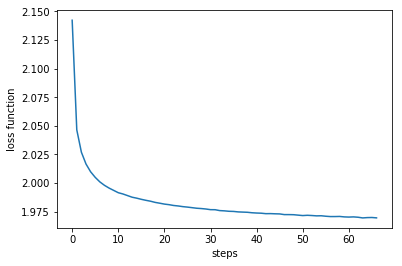

In [43]:
plt.plot(clf.loss_curve_)
plt.xlabel('steps')
plt.ylabel('loss function')
plt.show()

* Testen Sie das gelernte Modell mit der Testpartition. Für die Auswertung sollte die [Accurracy](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html#sklearn.metrics.accuracy_score) und die [Confusion Matrix](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html#sklearn.metrics.confusion_matrix) bestimmt werden. Finden Sie eine Parametereinstellung, die zu einer möglichst guten Accuracy führt. Interpretieren Sie die Confusion Matrix.

In [3]:
## load test data
X_test = np.load('X_test.npy')
y_test = np.load('y_test.npy')
## load labels
labels = np.load('labels.npy')

In [4]:
print 'X_test:', X_test.shape
print 'y_test:', y_test.shape

X_test: (150000, 1371)
y_test: (150000,)


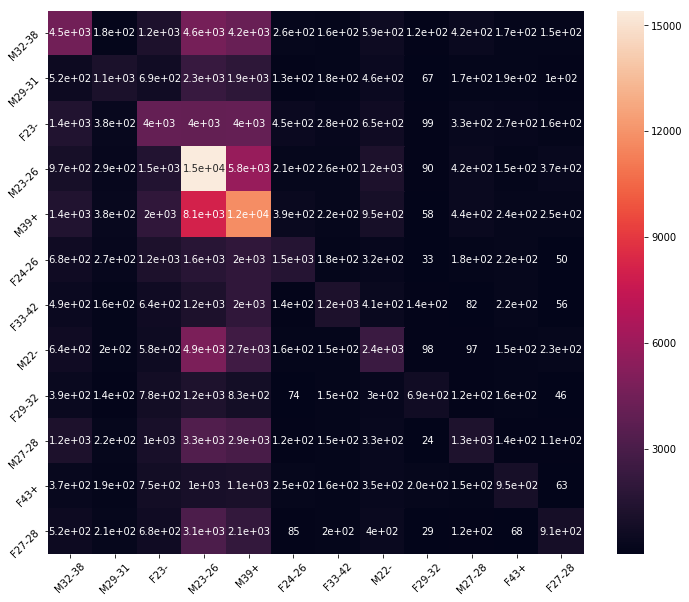

In [17]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import seaborn as sn

predictions = clf.predict(X_test)
#print y_test
#print predictions
#print accuracy_score(y_test, predictions)

conf_mat = confusion_matrix(y_test, predictions)

df_cm = pd.DataFrame(conf_mat, index = [i for i in labels],
                  columns = [i for i in labels.values])
plt.figure(figsize = (12,10))
sn.heatmap(df_cm, annot=True)
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.show()

'''
Confusion Matrix

In der Confusion Matrix lässt sich deutlich sehen, dass es für einige genderagroups, 
falsche Klassifizierungen gibt.

Auf der diagonalen Achse lassen sind richtigen Klassifikationen bereits sichtbar.
Für die Männer im Alter von 23-26 und 39+ sind mehr daten verfügbar.
Dennoch lässt sich auch hier die Diagonale erkennen.

Eine ausnahme bieten die Gruppen F23- M23-26 und M39+. Diese werden noch häufig verwechselt
'''

In [34]:
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions))

             precision    recall  f1-score   support

          0       0.35      0.27      0.31     16521
          1       0.31      0.15      0.20      7780
          2       0.27      0.25      0.26     15997
          3       0.30      0.58      0.40     26663
          4       0.29      0.45      0.35     26141
          5       0.40      0.19      0.25      8300
          6       0.36      0.17      0.23      6687
          7       0.29      0.20      0.23     12259
          8       0.42      0.14      0.21      4910
          9       0.34      0.12      0.17     10786
         10       0.33      0.17      0.23      5501
         11       0.37      0.11      0.17      8455

avg / total       0.32      0.31      0.28    150000



* Wenden Sie nun eine [5-fache Kreuzvalidierung](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html#sklearn.model_selection.cross_val_score) an und bestimmen Sie damit eine möglichst gute Parametereinstellung.

In [30]:
from sklearn import datasets, linear_model
from sklearn.model_selection import cross_val_score
from sklearn import svm
from sklearn.metrics import classification_report

scores = cross_val_score(clf, X, y, cv=5)
print scores
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

[ 0.30516421  0.30116774  0.30302222  0.30431014  0.30338015]
Accuracy: 0.30 (+/- 0.00)


In [33]:
np.save('scores.npy',scores)

In [ ]:
# parameter tuning
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPClassifier
import random
random.seed()

# prepare a range of alpha values to test
rand_hls = [ ( random.randint(1, 120), random.randint(1, 120) ) for k in range(10) ]

# Grid Search for Algorithm Tuning
grid = GridSearchCV(estimator=MLPClassifier(), param_grid=dict(hidden_layer_sizes=rand_hls), cv=5, scoring='accuracy'
                   #, n_jobs=-1
                   )
grid.fit(X, y)
print(grid)
# summarize the results of the grid search
print(grid.best_score_)
print(grid.best_estimator_.alpha)

* Mit welchen Parametern erzielen Sie die beste Accurracy? Wie hoch ist diese dann? Diskutieren Sie das Ergebnis.

In [ ]:
'''
Leider ist das Parameter-tuning nicht gelungen, da die berechnung zu lange braucht.
Die Verteilung der GridSearchCV Kreuzvalidierung auf alle vorhandenen CPU Kerne,
mit dem Parameter 'n_jobs=-1', hat das Jupyter Notebook zum einfrieren gebracht.
Das Ausführen der Funktion ohne Multithreading dauert leider zu lang auf unseren Geräten.

Allerdings sollte sich aus der GridSearchCV ein auflistung 
verschiedener getester Parameter mit den jeweiligen Accuracys, ergeben.

In unserem Fall wären das die zufällig 
generierten hidden_layer_sizes gewesen.
Es wäre noch möglich gewesen verschiedene Aktivierungsfunktionen zu nutzen allerdings 
hätte das zu noch mehr performance Problemen geführt.

GridSearchCV ist eine Funktion die, das testen der verschiedenen parameter übernimmt.
Aus den Ergebnissen kann man auf eine möglichst optimale Parametrisierung schließen.
'''